<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/Food_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv("train_fd.csv")
df_test = pd.read_csv("test_fd.csv")
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52114 entries, 0 to 52113
Data columns (total 9 columns):
id                       52114 non-null int64
week                     52113 non-null float64
center_id                52113 non-null float64
meal_id                  52113 non-null float64
checkout_price           52113 non-null float64
base_price               52113 non-null float64
emailer_for_promotion    52113 non-null float64
homepage_featured        52113 non-null float64
num_orders               52113 non-null float64
dtypes: float64(8), int64(1)
memory usage: 3.6 MB


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [4]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [5]:
meal_info.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [7]:
center_info.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [8]:
train = pd.merge(df_train, center_info, on = 'center_id')
test = pd.merge(df_test, center_info, on = 'center_id')
train.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0,647,56,TYPE_C,2.0
1,1466964,1.0,55.0,1993.0,136.83,135.83,0.0,0.0,270.0,647,56,TYPE_C,2.0
2,1346989,1.0,55.0,2539.0,134.86,135.86,0.0,0.0,189.0,647,56,TYPE_C,2.0
3,1338232,1.0,55.0,2139.0,339.50,437.53,0.0,0.0,54.0,647,56,TYPE_C,2.0
4,1448490,1.0,55.0,2631.0,243.50,242.50,0.0,0.0,40.0,647,56,TYPE_C,2.0


In [9]:
train = pd.merge(train, meal_info, on = 'meal_id')
train.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2.0,55.0,1885.0,135.83,152.29,0.0,0.0,323.0,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3.0,55.0,1885.0,132.92,133.92,0.0,0.0,96.0,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4.0,55.0,1885.0,135.86,134.86,0.0,0.0,163.0,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5.0,55.0,1885.0,146.50,147.50,0.0,0.0,215.0,647,56,TYPE_C,2.0,Beverages,Thai
5,1493612,6.0,55.0,1885.0,146.53,146.53,0.0,0.0,285.0,647,56,TYPE_C,2.0,Beverages,Thai
6,1110832,7.0,55.0,1885.0,145.53,146.53,0.0,0.0,148.0,647,56,TYPE_C,2.0,Beverages,Thai
7,1461167,8.0,55.0,1885.0,146.53,145.53,0.0,0.0,135.0,647,56,TYPE_C,2.0,Beverages,Thai
8,1102364,9.0,55.0,1885.0,134.83,134.83,0.0,0.0,175.0,647,56,TYPE_C,2.0,Beverages,Thai
9,1018130,10.0,55.0,1885.0,144.56,143.56,0.0,0.0,175.0,647,56,TYPE_C,2.0,Beverages,Thai


In [36]:
train['num_orders'].groupby(train['center_type'])

In [53]:
len(list(train['num_orders'].groupby(train['center_type'])))

2

In [55]:
np.mean(list(train['num_orders'].groupby(train['center_type']))[2][1])

205.79062092922274

In [60]:
train.groupby('center_type').agg({'num_orders':['sum', 'mean', lambda x: np.max(x) - np.min(x)]})

num_orders                     
                   sum        mean <lambda>
center_type                                
TYPE_A       8361590.0  276.718073  24286.0
TYPE_B       3517653.0  338.854927  13567.0
TYPE_C       2369679.0  205.790621  10111.0

In [10]:
test = pd.merge(test, meal_info, on = 'meal_id')
test.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


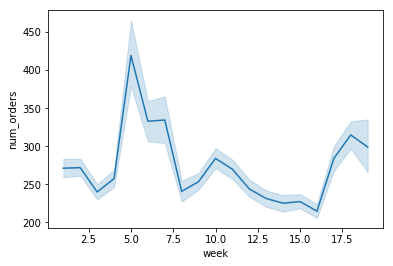

In [11]:
sns.lineplot(train['week'],train['num_orders']) # takes the mean of all num_orders in every week and plots the graph in confidence intervals

In [12]:
np.mean(train.loc[train['week'] == 3,'num_orders'])

239.82821662642291

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

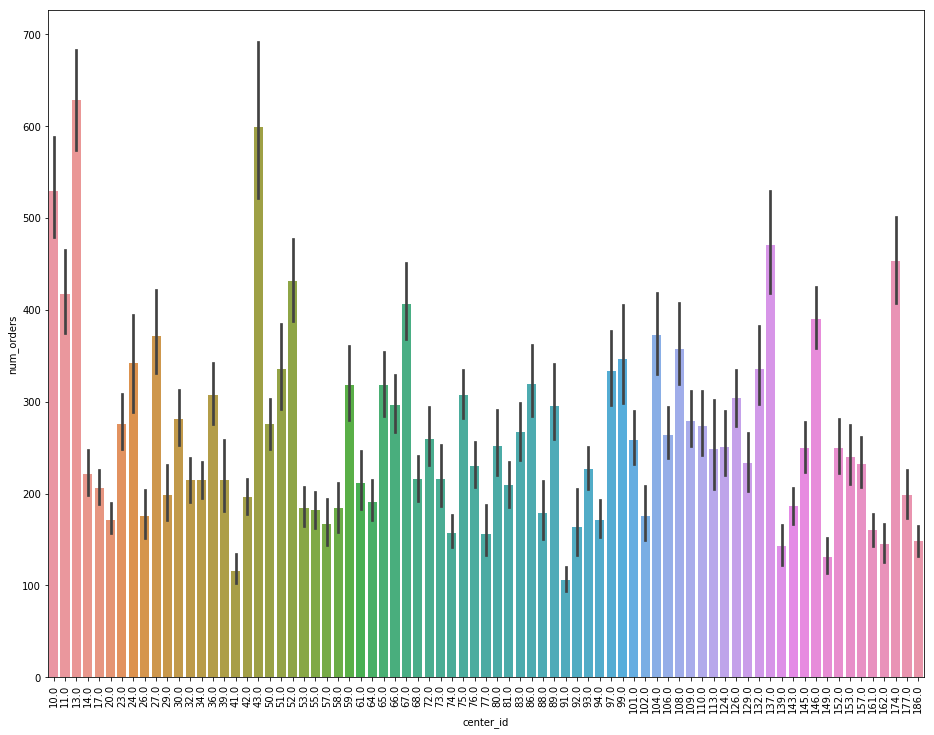

In [13]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15.7,12.27
sns.barplot(train['center_id'], train['num_orders'])
plt.xticks(rotation = 90)

In [14]:
np.mean(train.loc[train['center_id'] == 13, 'num_orders'])

628.7456037514654

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

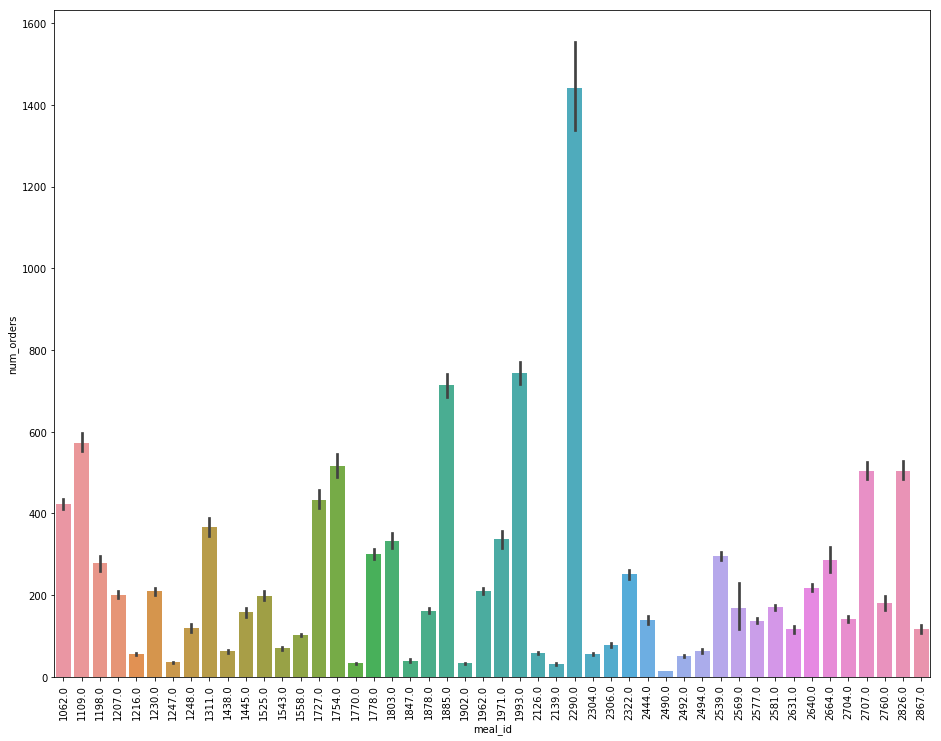

In [15]:
sns.barplot(train['meal_id'],train['num_orders'])
plt.xticks(rotation = 90)

In [16]:
np.mean(train.loc[train['meal_id'] == 1885, 'num_orders'])

714.5266955266956

In [17]:
train['center_type'].value_counts()

TYPE_A    30217
TYPE_C    11515
TYPE_B    10381
Name: center_type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

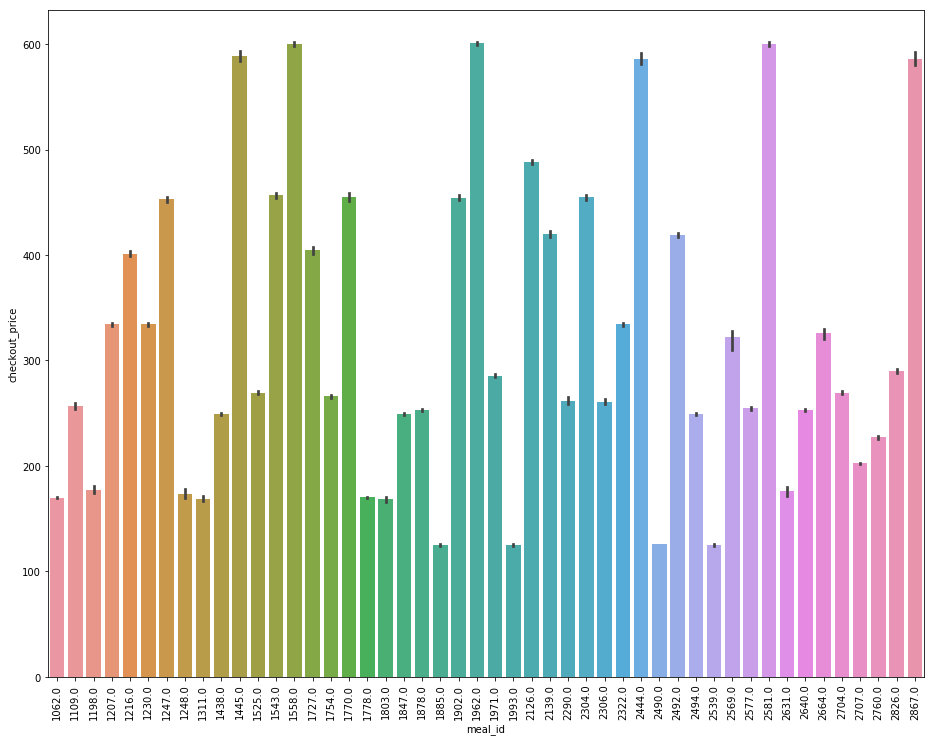

In [18]:
sns.barplot(train['meal_id'],train['checkout_price'])
plt.xticks(rotation = 90)

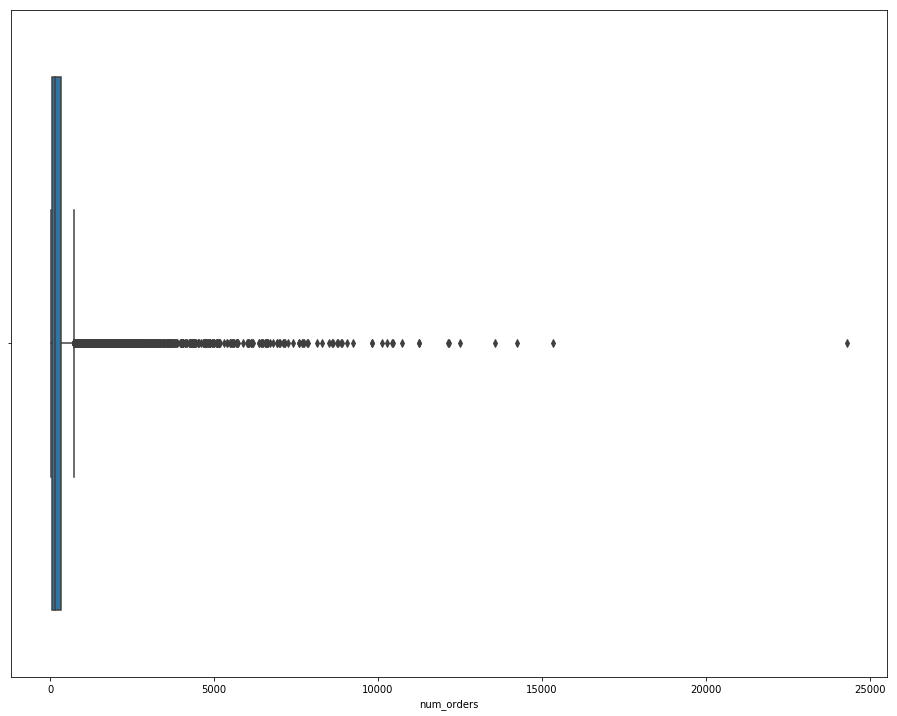

In [19]:
sns.boxplot(train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

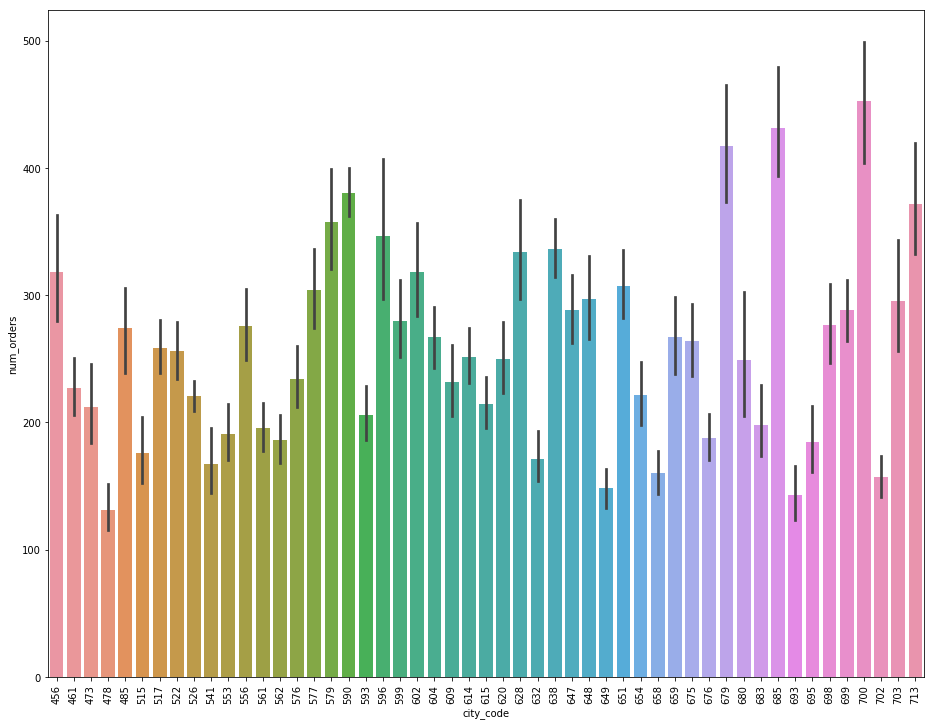

In [20]:
sns.barplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = 90)

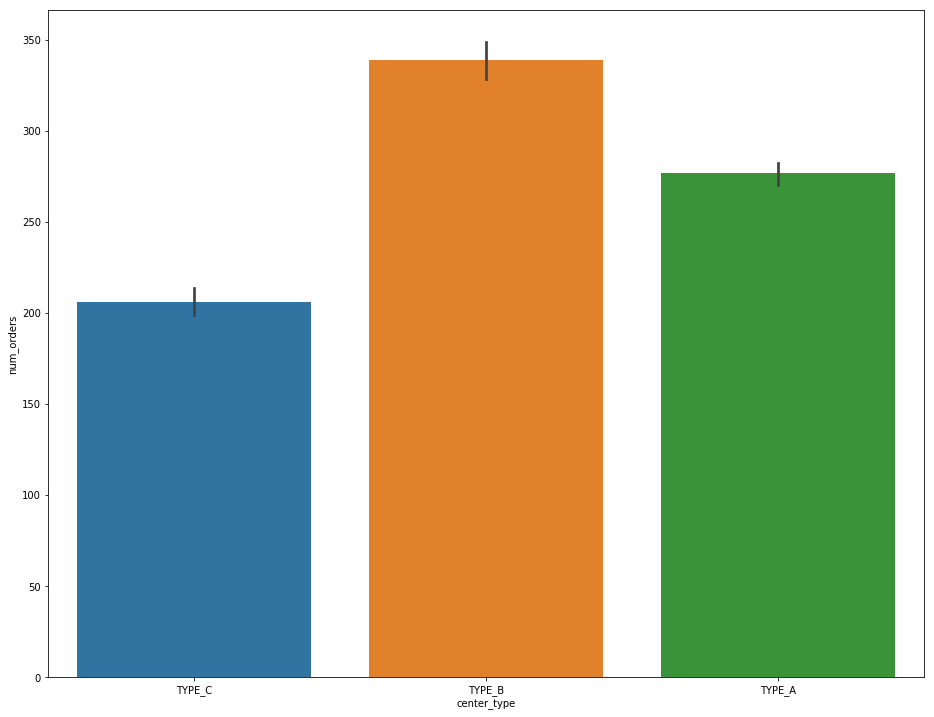

In [21]:
sns.barplot(train['center_type'],train['num_orders'])


In [22]:
train['category'].value_counts()

Beverages       15680
Rice Bowl        4158
Sandwich         4133
Pizza            4120
Starters         3822
Desert           3691
Pasta            3650
Other Snacks     3602
Seafood          3159
Biryani          2755
Extras           1706
Soup             1414
Salad             223
Name: category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

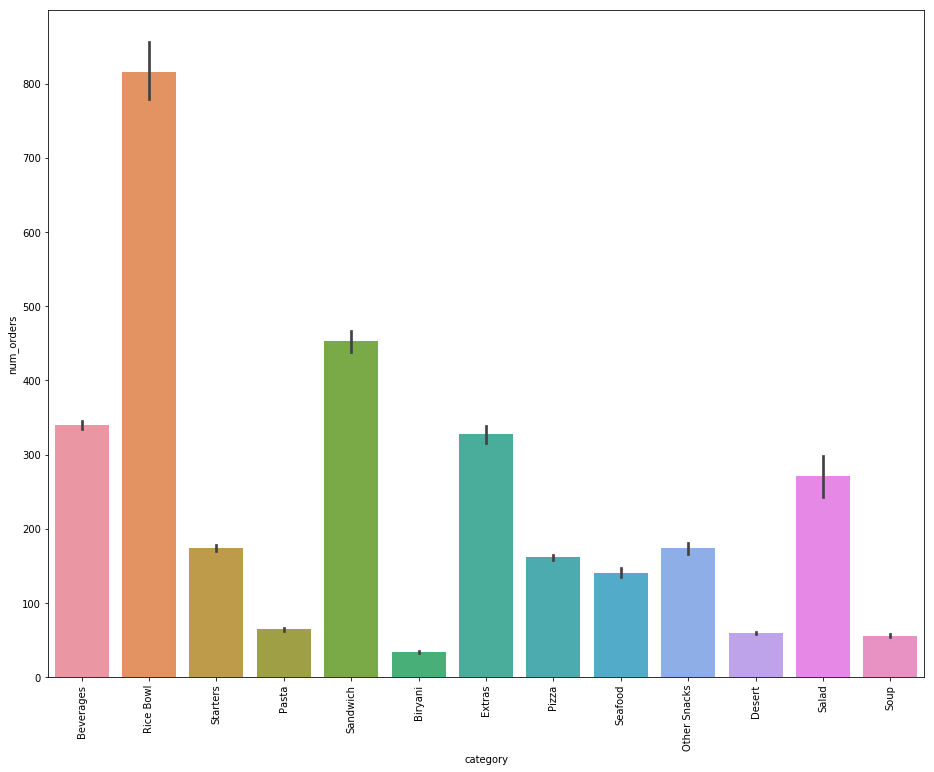

In [23]:
sns.barplot(train['category'],train['num_orders'])
plt.xticks(rotation = 90)

In [24]:
train['cuisine'].value_counts()

Thai           14688
Indian         13940
Italian        12162
Continental    11323
Name: cuisine, dtype: int64

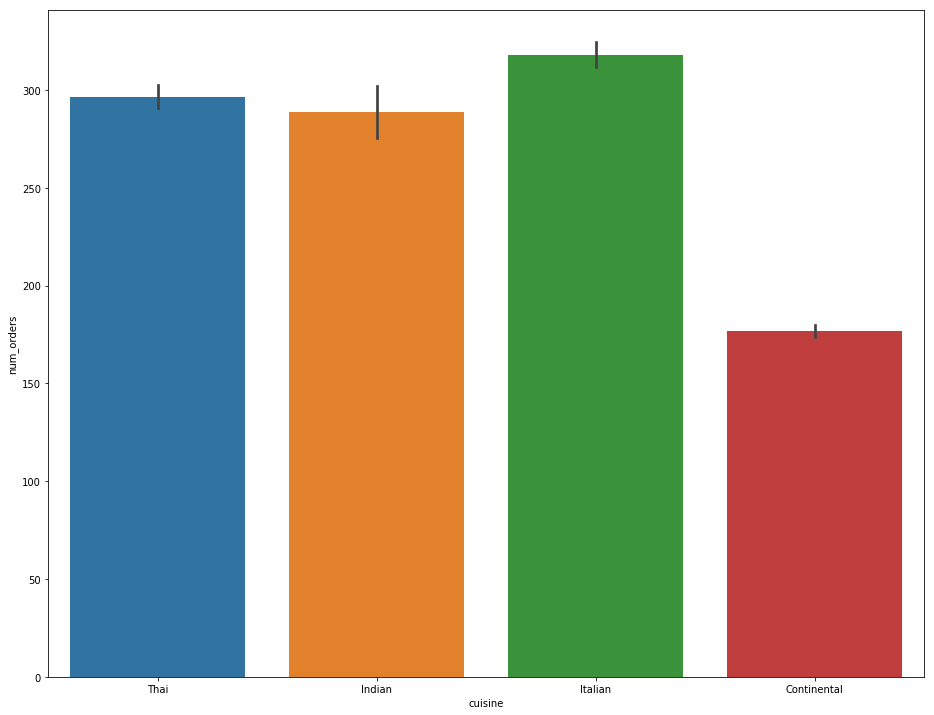

In [25]:
sns.barplot(train['cuisine'],train['num_orders'])

In [26]:
train['op_area'].unique()

array([2. , 3.6, 3.7, 5.3, 3.8, 6.7, 5.6, 3.9, 3.4, 5. , 2.8, 2.4, 4.8,
       4. , 4.6, 4.4, 4.5, 4.1, 0.9, 4.2, 2.9, 2.7, 4.7, 3.2, 3. , 7. ,
       1.9, 3.5, 6.3, 5.1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

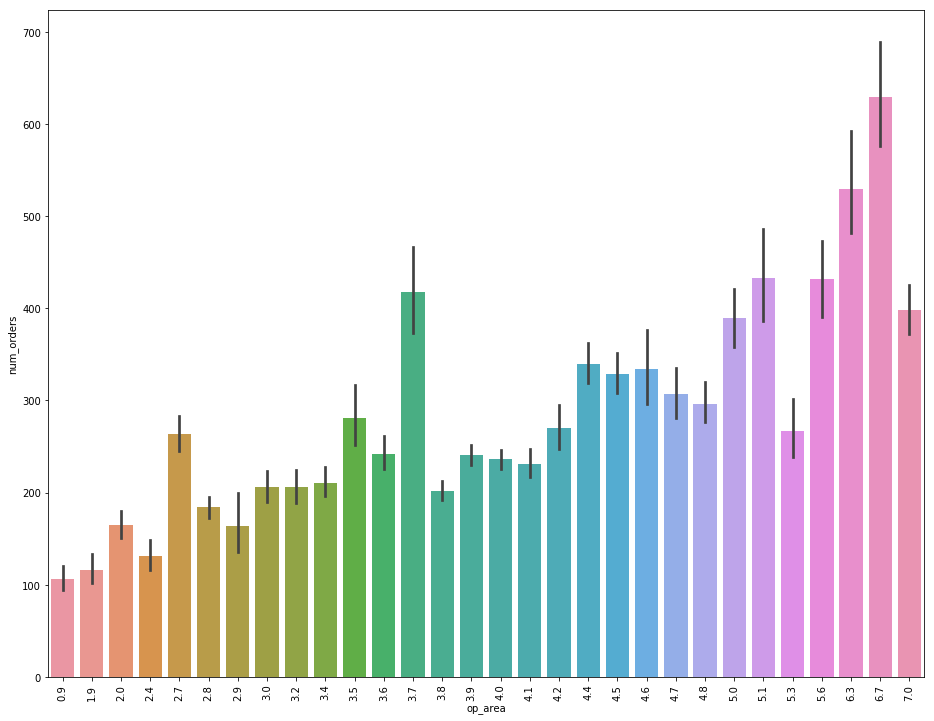

In [27]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation = 90)

In [28]:
train['region_code'].unique()

array([56, 85, 77, 34, 35, 71, 93, 23])

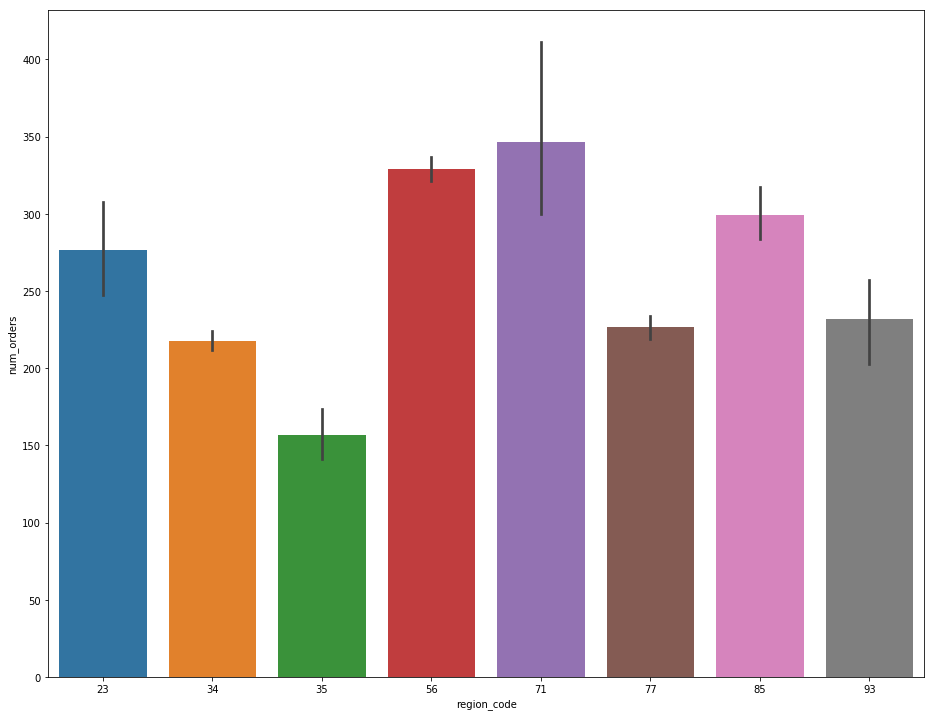

In [29]:
sns.barplot(train['region_code'],train['num_orders'])

In [30]:
train['emailer_for_promotion'].unique()

array([0., 1.])

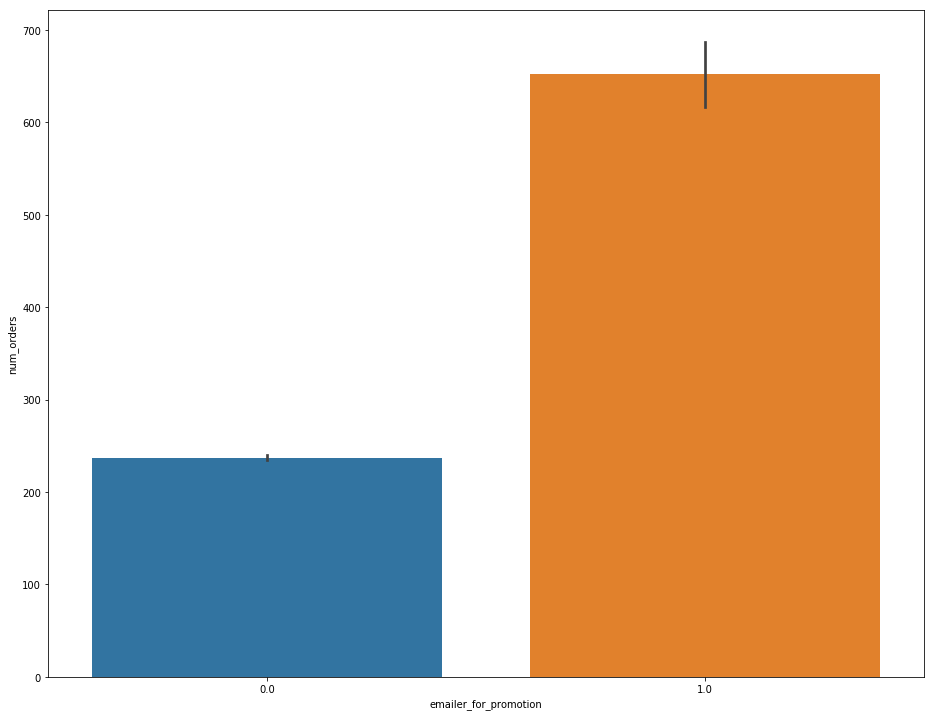

In [31]:
sns.barplot(train['emailer_for_promotion'],train['num_orders'])

In [32]:
train['homepage_featured'].unique()

array([0., 1.])

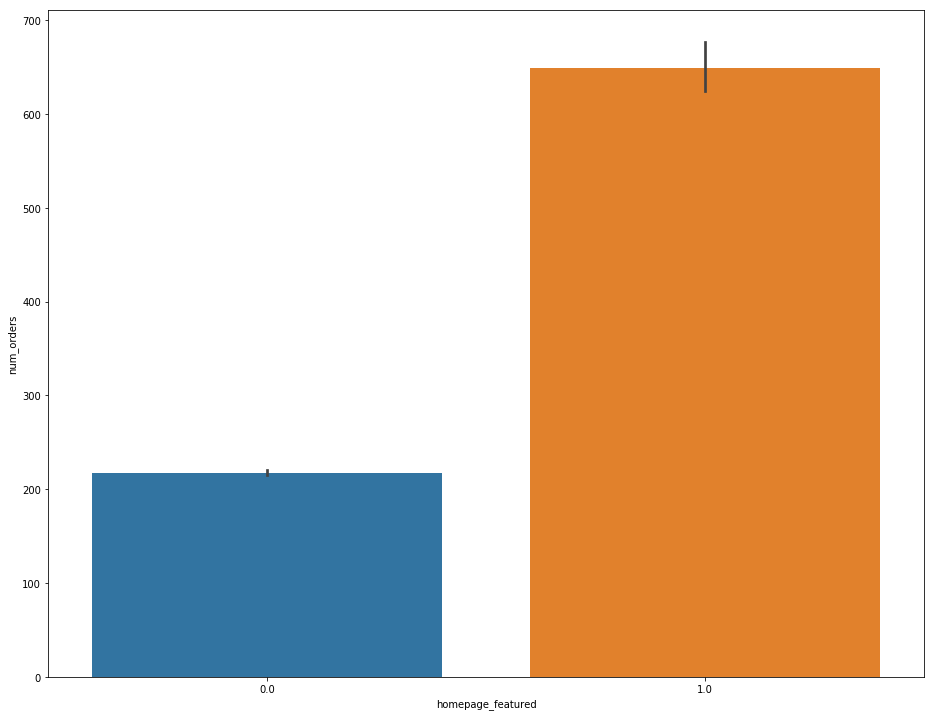

In [33]:
sns.barplot(train['homepage_featured'],train['num_orders'])